# Import


In [0]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import os
import numpy as np
import zipfile
from PIL import Image
import operator
import cv2

# Loading and Preprocessing dataset


In [0]:
!wget -cq http://web.cecs.pdx.edu/~fliu/project/kernelfusion/All_Image_and_Kernels.zip

In [0]:
zip_ref = zipfile.ZipFile('All_Image_and_Kernels.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [0]:
os.listdir()

['.config',
 'All_Image_and_Kernels',
 'All_Image_and_Kernels.zip',
 'sample_data']

In [0]:
len(os.listdir("All_Image_and_Kernels"))

8928

In [0]:
blurry = []
benchmark = []
blurry.clear
benchmark.clear
no_of_images = 2816
for i in range(no_of_images):
    path = 'All_Image_and_Kernels/blurry_'+str(i+1)+'.jpg'
    img = cv2.imread(path,0)
    img = cv2.resize(img,(256,256),interpolation = cv2.INTER_AREA)
    img = np.array(img)
    img = img.reshape(256,256,1)
    blurry.append(img)
    
    path = 'All_Image_and_Kernels/image_'+str(i+1)+'.jpg'
    img = cv2.imread(path,0)
    img = cv2.resize(img,(256,256),interpolation = cv2.INTER_AREA)
    img = np.array(img)
    img = img.reshape(256,256,1)
    benchmark.append(img)
    
blurry = np.array(blurry)
benchmark = np.array(benchmark)
blurry  = blurry.astype(np.float32)
benchmark  = benchmark.astype(np.float32)

#translated = blurry  
blurry.shape

(2816, 256, 256, 1)

In [0]:
blurry = (blurry-127.5)/127.5 #np.tanh(blurry)
benchmark = (benchmark-127.5)/127.5 # np.tanh(benchmark)

# Dataset Sample

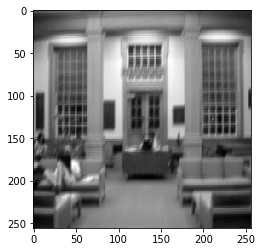

In [0]:
a = blurry[29]
a = a.reshape(256,256)
plt.imshow(a, cmap='gray' )

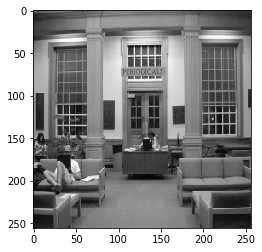

In [0]:
a = benchmark[29]
a = a.reshape(256,256)
plt.imshow(a, cmap ='gray' )

In [0]:
tf.reset_default_graph()

# Placeholders and Weights

In [0]:
def create_placeholder(X,mini_batch_size):
    
    X_blurry = tf.placeholder(name = "X_blurry" , shape = [mini_batch_size,X.shape[1],X.shape[2],X.shape[3]] , dtype =tf.float32)
    X_benchmark = tf.placeholder(name = "X_benchmark" , shape = [mini_batch_size,X.shape[1],X.shape[2],X.shape[3]] , dtype =tf.float32)
    
    return X_blurry,X_benchmark

In [0]:
with tf.variable_scope('Gen',reuse=tf.AUTO_REUSE):
    
    t_W8D = tf.get_variable(name='W8_D',initializer=tf.contrib.layers.xavier_initializer(uniform=False,seed=12), shape=[3,3,512,512],trainable=True)
    t_b8D = tf.get_variable(name="b8_D", initializer=tf.zeros([512]),trainable=True)
    t_W7D = tf.get_variable(name='W7_D',initializer=tf.contrib.layers.xavier_initializer(uniform=False,seed=12), shape=[3,3,512,1024],trainable=True)
    t_b7D = tf.get_variable(name="b7_D", initializer=tf.zeros([512]),trainable=True)
    t_W6D = tf.get_variable(name='W6_D',initializer=tf.contrib.layers.xavier_initializer(uniform=False,seed=12), shape=[3,3,256,1024],trainable=True)
    t_b6D = tf.get_variable(name="b6_D", initializer=tf.zeros([256]),trainable=True)
    t_W5D = tf.get_variable(name='W5_D',initializer=tf.contrib.layers.xavier_initializer(uniform=False,seed=12), shape=[3,3,128,512],trainable=True)
    t_b5D = tf.get_variable(name="b5_D", initializer=tf.zeros([128]),trainable=True)
    t_W4D = tf.get_variable(name='W4_D',initializer=tf.contrib.layers.xavier_initializer(uniform=False,seed=12), shape=[3,3,64,256],trainable=True)
    t_b4D = tf.get_variable(name="b4_D", initializer=tf.zeros([64]),trainable=True)
    t_W3D = tf.get_variable(name='W3_D',initializer=tf.contrib.layers.xavier_initializer(uniform=False,seed=12), shape=[3,3,32,128],trainable=True)
    t_b3D = tf.get_variable(name="b3_D", initializer=tf.zeros([32]),trainable=True)
    t_W2D = tf.get_variable(name='W2_D',initializer=tf.contrib.layers.xavier_initializer(uniform=False,seed=12), shape=[3,3,16,64],trainable=True)
    t_b2D = tf.get_variable(name="b2_D", initializer=tf.zeros([16]),trainable=True)
    t_W1D = tf.get_variable(name='W1_D',initializer=tf.contrib.layers.xavier_initializer(uniform=False,seed=12), shape=[3,3,1,32],trainable=True)
    t_b1D = tf.get_variable(name="b1_D", initializer=tf.zeros([1]),trainable=True)
    
    t_WD = tf.get_variable(name='W1_',initializer=tf.contrib.layers.xavier_initializer(uniform=False,seed=12), shape=[1,1,512,1024],trainable=True)
    t_bD = tf.get_variable(name="b1_", initializer=tf.zeros([512]),trainable=True)
    
    alpha = tf.Variable(2500, name='alpha',trainable=True,dtype=tf.float32)
    
    
    t_W1E = tf.get_variable(name='W1_E',initializer=tf.contrib.layers.xavier_initializer(uniform=False,seed=13), shape=[3,3,1,16],trainable=True)
    t_b1E = tf.get_variable(name="b1_E", initializer=tf.zeros([16]),trainable=True)
    t_W2E = tf.get_variable(name='W2_E',initializer=tf.contrib.layers.xavier_initializer(uniform=False,seed=13), shape=[3,3,16,32],trainable=True)
    t_b2E = tf.get_variable(name="b2_E", initializer=tf.zeros([32]),trainable=True)
    t_W3E = tf.get_variable(name='W3_E',initializer=tf.contrib.layers.xavier_initializer(uniform=False,seed=13), shape=[3,3,32,64],trainable=True)
    t_b3E = tf.get_variable(name="b3_E", initializer=tf.zeros([64]),trainable=True)
    t_W4E = tf.get_variable(name='W4_E',initializer=tf.contrib.layers.xavier_initializer(uniform=False,seed=13), shape=[3,3,64,128],trainable=True)
    t_b4E = tf.get_variable(name="b4_E", initializer=tf.zeros(128),trainable=True)
    t_W5E = tf.get_variable(name='W5_E',initializer=tf.contrib.layers.xavier_initializer(uniform=False,seed=13), shape=[3,3,128,256],trainable=True)
    t_b5E = tf.get_variable(name="b5_E", initializer=tf.zeros(256),trainable=True)
    t_W6E = tf.get_variable(name='W6_E',initializer=tf.contrib.layers.xavier_initializer(uniform=False,seed=13), shape=[3,3,256,512],trainable=True)
    t_b6E = tf.get_variable(name="b6_E", initializer=tf.zeros(512),trainable=True)
    t_W7E = tf.get_variable(name='W7_E',initializer=tf.contrib.layers.xavier_initializer(uniform=False,seed=13), shape=[3,3,512,512],trainable=True)
    t_b7E = tf.get_variable(name="b7_E", initializer=tf.zeros(512),trainable=True)
    t_W8E = tf.get_variable(name='W8_E',initializer=tf.contrib.layers.xavier_initializer(uniform=False,seed=13), shape=[3,3,512,512],trainable=True)
    t_b8E = tf.get_variable(name="b8_E", initializer=tf.zeros(512),trainable=True)   

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [0]:

with tf.variable_scope('Dis',reuse=tf.AUTO_REUSE):
        
    d_W1 = tf.get_variable(name='W1',initializer=tf.contrib.layers.xavier_initializer(uniform=False,seed=14), shape=[3,3,1,8],trainable=True)
    d_b1 = tf.get_variable(name="b1", initializer=tf.zeros([8]),trainable=True)
    d_W2 = tf.get_variable(name='W2',initializer=tf.contrib.layers.xavier_initializer(uniform=False,seed=14), shape=[3,3,8,16],trainable=True)
    d_b2 = tf.get_variable(name="b2", initializer=tf.zeros([16]),trainable=True)
    d_W3 = tf.get_variable(name='W3',initializer=tf.contrib.layers.xavier_initializer(uniform=False,seed=14), shape=[3,3,16,32],trainable=True)
    d_b3 = tf.get_variable(name="b3", initializer=tf.zeros([32]),trainable=True)
    d_W4 = tf.get_variable(name='W4',initializer=tf.contrib.layers.xavier_initializer(uniform=False,seed=14), shape=[3,3,32,64],trainable=True)
    d_b4 = tf.get_variable(name="b4", initializer=tf.zeros([64]),trainable=True)
    d_W5 = tf.get_variable(name='W5',initializer=tf.contrib.layers.xavier_initializer(uniform=False,seed=14), shape=[3,3,64,64],trainable=True)
    d_b5 = tf.get_variable(name="b5", initializer=tf.zeros([64]),trainable=True)


'\nwith tf.variable_scope(\'P_Dis\',reuse=tf.AUTO_REUSE):\n        \n    p_d_W1 = tf.get_variable(name=\'p_W1\',initializer=tf.contrib.layers.xavier_initializer(uniform=False,seed=14), shape=[3,3,1,8],trainable=True)\n    p_d_b1 = tf.get_variable(name="p_b1", initializer=tf.zeros([8]),trainable=True)\n    p_d_W2 = tf.get_variable(name=\'p_W2\',initializer=tf.contrib.layers.xavier_initializer(uniform=False,seed=14), shape=[3,3,8,16],trainable=True)\n    p_d_b2 = tf.get_variable(name="p_b2", initializer=tf.zeros([16]),trainable=True)\n    p_d_W3 = tf.get_variable(name=\'p_W3\',initializer=tf.contrib.layers.xavier_initializer(uniform=False,seed=14), shape=[3,3,16,32],trainable=True)\n    p_d_b3 = tf.get_variable(name="p_b3", initializer=tf.zeros([32]),trainable=True)\n    p_d_W4 = tf.get_variable(name=\'p_W4\',initializer=tf.contrib.layers.xavier_initializer(uniform=False,seed=14), shape=[3,3,32,64],trainable=True)\n    p_d_b4 = tf.get_variable(name="p_b4", initializer=tf.zeros([64]),trai

# Discriminator

In [0]:

def discriminator(X):

    #X(m,256,256,1)
    Z1 = tf.nn.conv2d(X,d_W1,strides = [1,2,2,1], padding = 'SAME')
    Z1 = tf.nn.bias_add(Z1,d_b1)
    A1 = tf.nn.leaky_relu(Z1)  #(m,128,128,8)

    Z2 = tf.nn.conv2d(A1,d_W2,strides = [1,2,2,1], padding = 'SAME')
    Z2 = tf.nn.bias_add(Z2,d_b2)
    A2 = tf.nn.leaky_relu(Z2)  #(m,64,64,16)
    
    Z3 = tf.nn.conv2d(A2,d_W3,strides = [1,2,2,1], padding = 'SAME') 
    Z3 = tf.nn.bias_add(Z3,d_b3)
    A3 = tf.nn.leaky_relu(Z3)  #(m,32,32,32)
   
    Z4 = tf.nn.conv2d(A3,d_W4,strides = [1,2,2,1], padding = 'SAME')
    Z4 = tf.nn.bias_add(Z4,d_b4)
    A4 = tf.nn.leaky_relu(Z4)  #(m,16,16,64)
    
    #Z5 = tf.nn.conv2d(A4,d_W5,strides = [1,2,2,1], padding = 'SAME')
    #Z5 = tf.nn.bias_add(Z5,d_b5)
    #A5 = tf.nn.leaky_relu(Z5)  #(m,8,8,64)
    
    #Z6 = tf.contrib.layers.flatten(A5)
    #A6 = tf.contrib.layers.fully_connected(Z6,1600,activation_fn=tf.nn.leaky_relu) 
    #A7 = tf.contrib.layers.fully_connected(A6,32,activation_fn=tf.nn.leaky_relu)
    #Z8 = tf.contrib.layers.fully_connected(A7,1,activation_fn=None)
    
    return Z4


# Translator


In [0]:
def translator(X,mini_batch_size):

    #X(m,256,256,1)
    Z1E = tf.nn.conv2d(X,t_W1E,strides = [1,2,2,1], padding = 'SAME') 
    Z1E = tf.nn.bias_add(Z1E,t_b1E)
    A1E = tf.nn.leaky_relu(Z1E,alpha=0.3)  #(m,128,128,16)
    
    Z2E = tf.nn.conv2d(A1E,t_W2E,strides = [1,2,2,1], padding = 'SAME')
    Z2E = tf.nn.bias_add(Z2E,t_b2E)
    A2E = tf.nn.leaky_relu(Z2E,alpha=0.3)  #(m,64,64,32)
    
    Z3E = tf.nn.conv2d(A2E,t_W3E,strides = [1,2,2,1], padding = 'SAME')
    Z3E = tf.nn.bias_add(Z3E,t_b3E)
    A3E = tf.nn.leaky_relu(Z3E,alpha=0.3)  #(m,32,32,64)
    
    Z4E = tf.nn.conv2d(A3E,t_W4E,strides = [1,2,2,1], padding = 'SAME')
    Z4E = tf.nn.bias_add(Z4E,t_b4E)
    A4E = tf.nn.leaky_relu(Z4E,alpha=0.3)  #(m,16,16,128)
    
    Z5E = tf.nn.conv2d(A4E,t_W5E,strides = [1,2,2,1], padding = 'SAME')
    Z5E = tf.nn.bias_add(Z5E,t_b5E)
    A5E = tf.nn.leaky_relu(Z5E,alpha=0.3)  #(m,8,8,256)
    
    Z6E = tf.nn.conv2d(A5E,t_W6E,strides = [1,2,2,1], padding = 'SAME')
    Z6E = tf.nn.bias_add(Z6E,t_b6E)
    A6E = tf.nn.leaky_relu(Z6E,alpha=0.3)  #(m,4,4,512)
    
    Z7E = tf.nn.conv2d(A6E,t_W7E,strides = [1,2,2,1], padding = 'SAME')
    Z7E = tf.nn.bias_add(Z7E,t_b7E)
    A7E = tf.nn.leaky_relu(Z7E,alpha=0.3)  #(m,2,2,512)
    
    Z8E = tf.nn.conv2d(A7E,t_W8E,strides = [1,2,2,1], padding = 'SAME')
    Z8E = tf.nn.bias_add(Z8E,t_b8E)
    #A8E = tf.nn.leaky_relu(Z8E,alpha=0.3)  #(m,1,1,512)
    
    
    
    
    Z7D_shape = [mini_batch_size,2,2,512]
    Z7D = tf.nn.conv2d_transpose(Z8E,t_W8D,output_shape=Z7D_shape, strides=[1,2,2,1], padding='SAME')
    Z7D = tf.nn.bias_add(Z7D,t_b8D)
    A7D = tf.nn.leaky_relu(Z7D)
    A7D = tf.concat([A7D , A7E],3) #(m,2,2,1024)
    #A7D = tf.contrib.layers.batch_norm(A7D,reuse=tf.AUTO_REUSE,scope='Gen')
    
    Z6D_shape = [mini_batch_size,4,4,512]
    Z6D = tf.nn.conv2d_transpose(A7D,t_W7D,output_shape=Z6D_shape, strides=[1,2,2,1], padding='SAME')
    Z6D = tf.nn.bias_add(Z6D,t_b7D)
    A6D = tf.nn.leaky_relu(Z6D)
    A6D = tf.concat([A6D , A6E],3) #(m,4,4,1024)
    #with tf.variable_scope('Gen',reuse=tf.AUTO_REUSE):
        #A6D = tf.layers.batch_normalization(A6D,name="b_n_0")
    
    ZD_shape = [mini_batch_size,4,4,512]
    ZD = tf.nn.conv2d_transpose(A6D,t_WD,output_shape=ZD_shape, strides=[1,1,1,1], padding='SAME')
    ZD = tf.nn.bias_add(ZD,t_bD)
    AD = tf.nn.leaky_relu(ZD)
    #with tf.variable_scope('Gen',reuse=tf.AUTO_REUSE):
        #AD = tf.layers.batch_normalization(AD,name="b_n_X")
    
    
    Z5D_shape = [mini_batch_size,8,8,256]
    Z5D = tf.nn.conv2d_transpose(A6D,t_W6D,output_shape=Z5D_shape, strides=[1,2,2,1], padding='SAME')
    Z5D = tf.nn.bias_add(Z5D,t_b6D)
    A5D = tf.nn.leaky_relu(Z5D)
    A5D = tf.concat([A5D , A5E],3) #(m,8,8,512)
    #with tf.variable_scope('Gen',reuse=tf.AUTO_REUSE):
       #A5D = tf.layers.batch_normalization(A5D,name="b_n_1")
    
    
    
    Z4D_shape = [mini_batch_size,16,16,128]
    Z4D = tf.nn.conv2d_transpose(A5D,t_W5D,output_shape=Z4D_shape, strides=[1,2,2,1], padding='SAME')
    Z4D = tf.nn.bias_add(Z4D,t_b5D)
    A4D = tf.nn.leaky_relu(Z4D)
    A4D = tf.concat([A4D , A4E],3) #(m,16,16,256)
    #with tf.variable_scope('Gen',reuse=tf.AUTO_REUSE):
        #A4D = tf.layers.batch_normalization(A4D,name="b_n_2")
        
    Z3D_shape = [mini_batch_size,32,32,64]
    Z3D = tf.nn.conv2d_transpose(A4D,t_W4D,output_shape=Z3D_shape, strides=[1,2,2,1], padding='SAME') 
    Z3D = tf.nn.bias_add(Z3D,t_b4D)
    A3D = tf.nn.leaky_relu(Z3D)
    A3D = tf.concat([A3D , A3E], 3) #(m,32,32,128)
    with tf.variable_scope('Gen',reuse=tf.AUTO_REUSE):
        A3D = tf.layers.batch_normalization(A3D,name="b_n_3")

    
    Z2D_shape =[mini_batch_size,64,64,32]
    Z2D = tf.nn.conv2d_transpose(A3D,t_W3D,output_shape=Z2D_shape, strides=[1,2,2,1], padding='SAME')
    Z2D = tf.nn.bias_add(Z2D,t_b3D)
    A2D = tf.nn.leaky_relu(Z2D)
    A2D = tf.concat([A2D ,A2E], 3) #(m,64,64,64)
    with tf.variable_scope('Gen',reuse=tf.AUTO_REUSE):
        A2D = tf.layers.batch_normalization(A2D,name="b_n_4")

        
    Z1D_shape =[mini_batch_size,128,128,16] 
    Z1D = tf.nn.conv2d_transpose(A2D,t_W2D,output_shape=Z1D_shape, strides=[1,2,2,1], padding='SAME')
    Z1D = tf.nn.bias_add(Z1D,t_b2D)
    A1D = tf.nn.leaky_relu(Z1D)
    A1D = tf.concat([A1D , A1E], 3) #(m,128,128,32)
    with tf.variable_scope('Gen',reuse=tf.AUTO_REUSE):
        A1D = tf.layers.batch_normalization(A1D,name="b_n_5")
    

    X_shape =[mini_batch_size,256,256,1]
    X_translated = tf.nn.conv2d_transpose(A1D,t_W1D,output_shape=X_shape, strides=[1,2,2,1], padding='SAME')
    X_translated = tf.nn.bias_add(X_translated,t_b1D)
    with tf.variable_scope('Gen',reuse=tf.AUTO_REUSE):
        X_translated = tf.layers.batch_normalization(X_translated,name="b_n_6")
    X_translated = tf.nn.tanh(X_translated) #(X_translated-127.5)/127.5 

    return X_translated

# Loss


In [0]:
def loss_function(X_blurry,X_benchmark,mini_batch_size):

    X_translated = translator(X_blurry,mini_batch_size)
    
    #X_t = tf.image.random_crop(X_translated , size=[256,32,32,1] , seed=1 , name=None)
    #X_b = tf.image.random_crop(X_benchmark , size=[256,32,32,1] , seed=1 , name=None)
       
    logits_benchmark = discriminator(X_benchmark)
    logits_translated = discriminator(X_translated)
    
    benchmark_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits_benchmark,labels=tf.ones_like(logits_benchmark)))
    translated_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits_translated,labels=tf.zeros_like(logits_translated)))
    
    dis_loss = benchmark_loss + translated_loss
    
    L1_loss   = tf.reduce_mean(tf.math.abs(X_benchmark-X_translated))
    L_loss    = tf.reduce_mean(tf.math.log(tf.math.cosh(X_benchmark-X_translated)))
    tran_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits_translated,labels=tf.ones_like(logits_translated))) 
    tran_loss = tran_loss + alpha*L1_loss   # + L_loss
    
    return dis_loss,tran_loss

# Model


In [0]:
Gen_Imgs =[]

In [0]:
def model(blurry,benchmark,epochs = 10, minibatch_size = 10,learning_rate=0.001):
    
    
    X_blurry,X_benchmark = create_placeholder(blurry,minibatch_size)

    dis_loss,tran_loss = loss_function(X_blurry,X_benchmark,minibatch_size)
   
    tran_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="Gen")
    disc_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope="Dis")
    
    dis_optimizer = tf.train.AdamOptimizer(learning_rate).minimize(dis_loss,var_list=disc_vars)
    tran_optimizer = tf.train.AdamOptimizer(learning_rate).minimize(tran_loss,var_list=tran_vars)
    
    init = tf.global_variables_initializer()
    sess.run(init)
    
    d_mini_cost=0
    d_costs=[]
    t_mini_cost=0
    t_costs=[]
    N = math.floor(blurry.shape[0]/minibatch_size)
    
    for i in range(1,epochs):
        for j in range(N):
            _,d_c = sess.run([dis_optimizer, dis_loss],feed_dict={X_benchmark  : benchmark [j*minibatch_size:(j+1)*minibatch_size,:,:,:],X_blurry : blurry[j*minibatch_size:(j+1)*minibatch_size,:,:,:]})
            _,t_c = sess.run([tran_optimizer,tran_loss],feed_dict={X_benchmark  : benchmark [j*minibatch_size:(j+1)*minibatch_size,:,:,:],X_blurry : blurry[j*minibatch_size:(j+1)*minibatch_size,:,:,:]})
            d_mini_cost += d_c
            t_mini_cost += t_c
        d_mini_cost = d_mini_cost/N
        t_mini_cost = t_mini_cost/N
        if i%5 == 0:
            print("Epochs : "+str(i) + " : DIS_COST  "+str(d_mini_cost) + "       || GEN_COST  "+ str(t_mini_cost) )
        if i%10 == 0:
            tst_img = translator(blurry[29:30,:,:,:],1)
            tst_img = sess.run(tst_img)
            Gen_Imgs.append(tst_img)
            tst_img = tst_img.reshape(256,256)
            if i%10 == 0:
                plt.axis('off')
                plt.imshow(tst_img , cmap ='gray')
                plt.show()
        if i%1 == 0:
            d_costs.append(d_mini_cost)
            t_costs.append(t_mini_cost)
        g_mini_cost=0
        d_mini_cost=0
    
    plt.plot(np.squeeze(d_costs))
    plt.ylabel('d_cost')
    plt.xlabel('Iterations')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    plt.plot(np.squeeze(t_costs))
    plt.ylabel('t_cost')
    plt.xlabel('Iterations')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return Gen_Imgs

# Training

In [0]:
sess = tf.Session()

Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epochs : 5 : DIS_COST  1.3692054640163074       || GEN_COST  295.00272600927514
Epochs : 10 : DIS_COST  0.8807926936583086       || GEN_COST  253.54542585632862


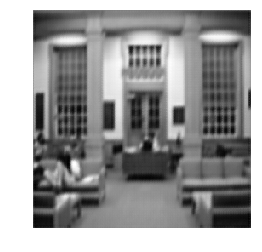

Epochs : 15 : DIS_COST  0.7013140754266218       || GEN_COST  235.785598543983
Epochs : 20 : DIS_COST  0.5857472690668973       || GEN_COST  229.7599804161576


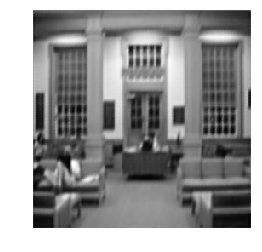

Epochs : 25 : DIS_COST  0.5473064563491128       || GEN_COST  226.92671837951232
Epochs : 30 : DIS_COST  0.5008300028064034       || GEN_COST  224.4303551030188


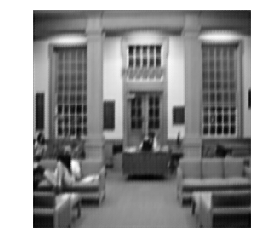

Epochs : 35 : DIS_COST  0.46672357483343646       || GEN_COST  222.81985467168852
Epochs : 40 : DIS_COST  0.4423050148920579       || GEN_COST  221.32323206256717


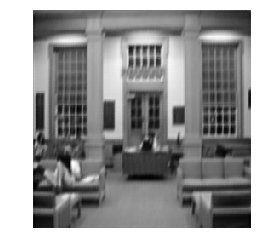

Epochs : 45 : DIS_COST  0.4851050078868866       || GEN_COST  220.67528008127255
Epochs : 50 : DIS_COST  0.41855545477433637       || GEN_COST  219.49204699638466


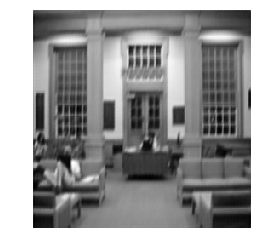

Epochs : 55 : DIS_COST  0.47273304245688696       || GEN_COST  218.55343912162942
Epochs : 60 : DIS_COST  0.3961571888490157       || GEN_COST  218.32355500780525


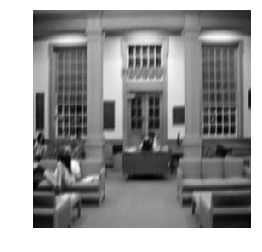

Epochs : 65 : DIS_COST  0.4933668185364116       || GEN_COST  218.1051640551922
Epochs : 70 : DIS_COST  0.4381694495677948       || GEN_COST  217.37797596222927


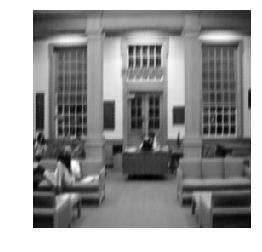

Epochs : 75 : DIS_COST  0.511713361198252       || GEN_COST  217.39257424955056
Epochs : 80 : DIS_COST  0.4746452678333629       || GEN_COST  216.40187978779704


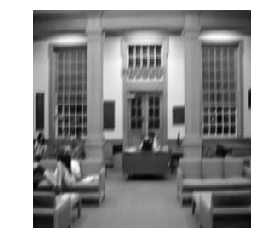

Epochs : 85 : DIS_COST  0.5162561291998083       || GEN_COST  216.55197649082137
Epochs : 90 : DIS_COST  0.502445787191391       || GEN_COST  216.02880241270742


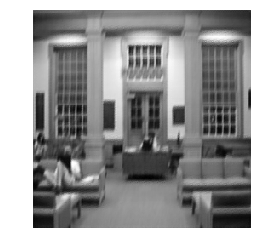

Epochs : 95 : DIS_COST  0.5085703188722784       || GEN_COST  215.64523775299494
Epochs : 100 : DIS_COST  0.5054226030002941       || GEN_COST  215.38767322366178


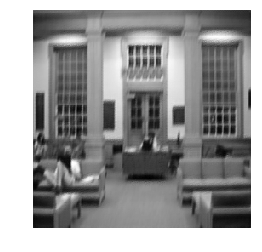

Epochs : 105 : DIS_COST  0.5284389121965929       || GEN_COST  214.96887906217242
Epochs : 110 : DIS_COST  0.520327711647207       || GEN_COST  214.39139730391025


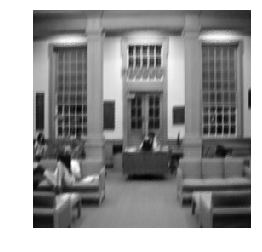

Epochs : 115 : DIS_COST  0.5136041343212128       || GEN_COST  213.80755190877
Epochs : 120 : DIS_COST  0.5279601947827772       || GEN_COST  213.09364237639014


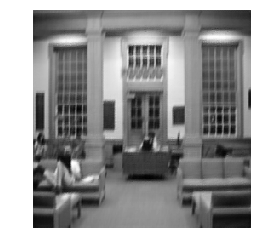

Epochs : 125 : DIS_COST  0.5434594045985829       || GEN_COST  211.86808454172188
Epochs : 130 : DIS_COST  0.5545885589989749       || GEN_COST  209.8418557917311


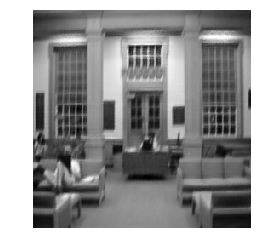

Epochs : 135 : DIS_COST  0.5478033748540011       || GEN_COST  207.68705816874152
Epochs : 140 : DIS_COST  0.5582348704338074       || GEN_COST  205.62680682212286


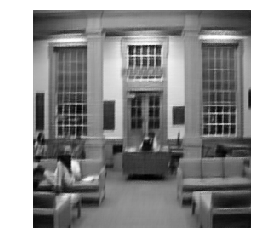

Epochs : 145 : DIS_COST  0.5860109600153837       || GEN_COST  201.4565996159219
Epochs : 150 : DIS_COST  0.5908893888646906       || GEN_COST  197.81043145718567


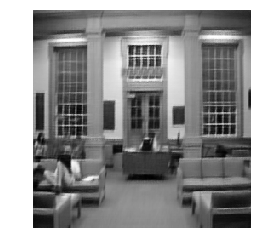

Epochs : 155 : DIS_COST  0.6259250044822693       || GEN_COST  193.357128512076
Epochs : 160 : DIS_COST  0.6220927130092274       || GEN_COST  190.31299314240889


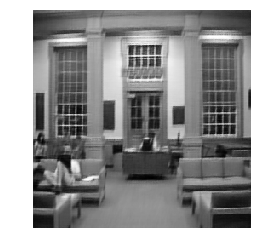

Epochs : 165 : DIS_COST  0.6741345687346025       || GEN_COST  186.76918043962038
Epochs : 170 : DIS_COST  0.6542674519798972       || GEN_COST  183.96517430201877


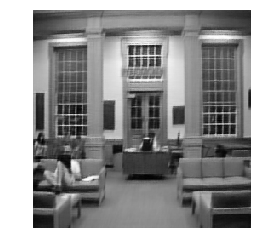

Epochs : 175 : DIS_COST  0.6525219895622947       || GEN_COST  181.90003367413
Epochs : 180 : DIS_COST  0.6714317365126177       || GEN_COST  178.6207054287461


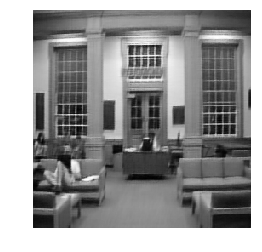

Epochs : 185 : DIS_COST  0.6539020484144037       || GEN_COST  176.5422169080897
Epochs : 190 : DIS_COST  0.6546646573326804       || GEN_COST  175.07469778116774


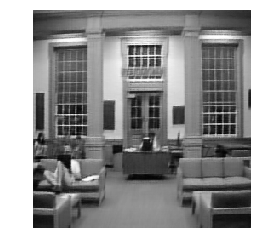

Epochs : 195 : DIS_COST  0.6628427722237327       || GEN_COST  172.8855174211432
Epochs : 200 : DIS_COST  0.6719292293895375       || GEN_COST  172.1647698046022


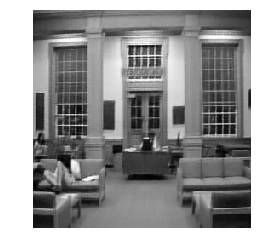

Epochs : 205 : DIS_COST  0.6743122772736982       || GEN_COST  171.58039424339722
Epochs : 210 : DIS_COST  0.6796515583992004       || GEN_COST  169.38738357066876


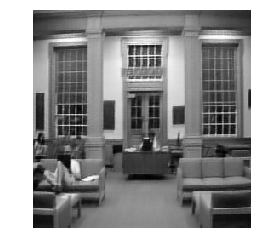

Epochs : 215 : DIS_COST  0.6605088223110546       || GEN_COST  166.94790841458254
Epochs : 220 : DIS_COST  0.6438827623020519       || GEN_COST  166.21138656239089


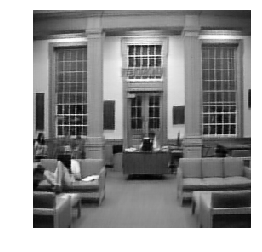

Epochs : 225 : DIS_COST  0.671950101852417       || GEN_COST  166.89849813395156
Epochs : 230 : DIS_COST  0.685980970209295       || GEN_COST  164.94941700245613


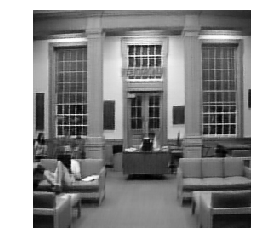

Epochs : 235 : DIS_COST  0.671449525789781       || GEN_COST  165.30852559721404
Epochs : 240 : DIS_COST  0.6580320813439109       || GEN_COST  162.07782551816408


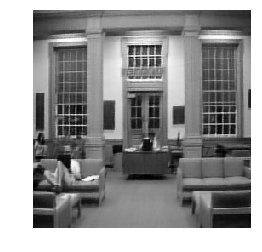

Epochs : 245 : DIS_COST  0.6696254069154913       || GEN_COST  161.83233738672115
Epochs : 250 : DIS_COST  0.658097738569433       || GEN_COST  159.766075906882


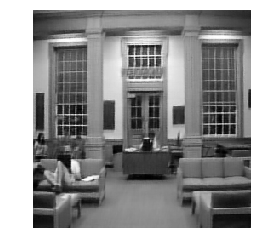

Epochs : 255 : DIS_COST  0.6488119092854586       || GEN_COST  159.8435484298579
Epochs : 260 : DIS_COST  0.6779993989250876       || GEN_COST  157.82015381325425


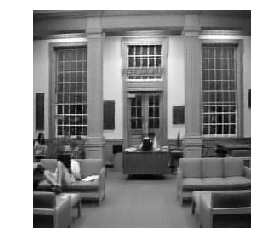

Epochs : 265 : DIS_COST  0.6379284262657166       || GEN_COST  156.8547744296769
Epochs : 270 : DIS_COST  0.6482788270170038       || GEN_COST  159.9672861834758


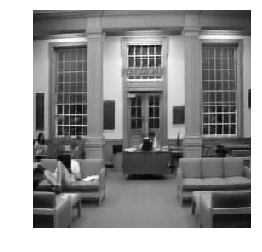

Epochs : 275 : DIS_COST  0.6805447556755759       || GEN_COST  154.23201696762214
Epochs : 280 : DIS_COST  0.6539253321560946       || GEN_COST  153.62879810280447


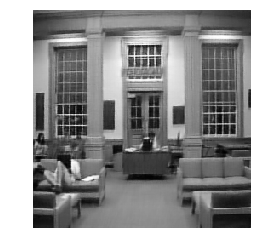

Epochs : 285 : DIS_COST  0.6543384465304288       || GEN_COST  154.30739376401428
Epochs : 290 : DIS_COST  0.6796913688833063       || GEN_COST  151.57349719238712


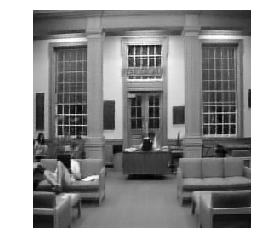

Epochs : 295 : DIS_COST  0.6690532510930841       || GEN_COST  151.6537265401769
Epochs : 300 : DIS_COST  0.6556907621296969       || GEN_COST  150.2401069576187


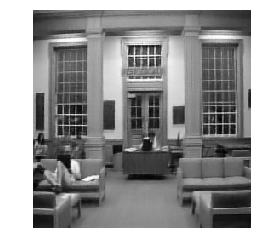

Epochs : 305 : DIS_COST  0.6927583325992931       || GEN_COST  150.23444511823865
Epochs : 310 : DIS_COST  0.6393808343193748       || GEN_COST  149.31105911814117


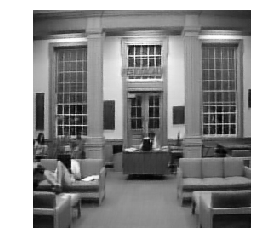

Epochs : 315 : DIS_COST  0.6700666655193676       || GEN_COST  148.547460430251
Epochs : 320 : DIS_COST  0.6429524692622098       || GEN_COST  148.04211983023146


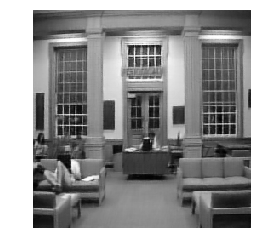

Epochs : 325 : DIS_COST  0.6476442055268721       || GEN_COST  147.60086213477672
Epochs : 330 : DIS_COST  0.666850360957059       || GEN_COST  148.2581941939977


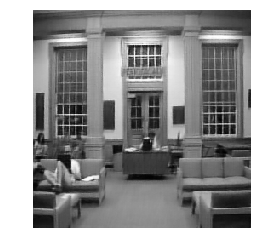

Epochs : 335 : DIS_COST  0.6641684120351617       || GEN_COST  149.95198660386527
Epochs : 340 : DIS_COST  0.6561757271940057       || GEN_COST  146.3739113942856


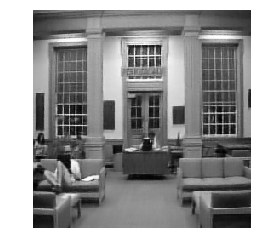

Epochs : 345 : DIS_COST  0.654364905574105       || GEN_COST  148.03980682613482
Epochs : 350 : DIS_COST  0.6961887587200511       || GEN_COST  149.86501867530976


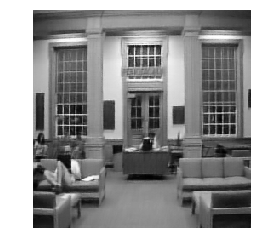

Epochs : 355 : DIS_COST  0.6624117005955089       || GEN_COST  145.68154442737543
Epochs : 360 : DIS_COST  0.650808410211043       || GEN_COST  143.2275079401826


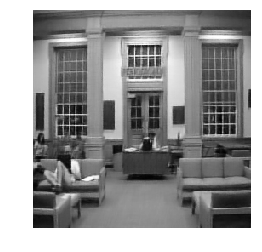

Epochs : 365 : DIS_COST  0.6637372049418363       || GEN_COST  143.92939556204422
Epochs : 370 : DIS_COST  0.6610694581812079       || GEN_COST  144.34712511781393


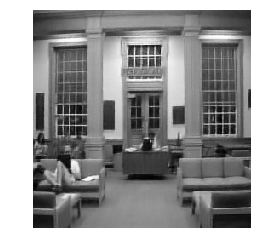

Epochs : 375 : DIS_COST  0.6656081297180869       || GEN_COST  144.7890931190209
Epochs : 380 : DIS_COST  0.679038481278853       || GEN_COST  146.57760784703657


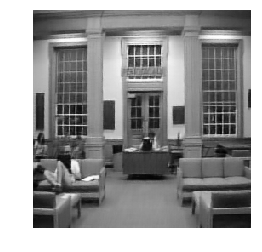

Epochs : 385 : DIS_COST  0.6749424175782637       || GEN_COST  147.12035434044907
Epochs : 390 : DIS_COST  0.6859011270783164       || GEN_COST  144.26392378311445


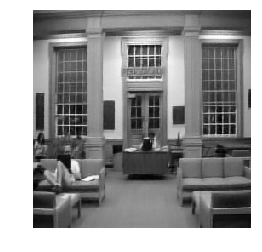

Epochs : 395 : DIS_COST  0.6694915457205339       || GEN_COST  141.64042444353151
Epochs : 400 : DIS_COST  0.6599181240255182       || GEN_COST  140.20595747652877


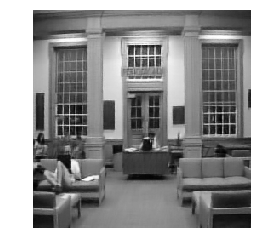

Epochs : 405 : DIS_COST  0.6698169816624034       || GEN_COST  140.93469088376816
Epochs : 410 : DIS_COST  0.6678953658450734       || GEN_COST  141.71015464194886


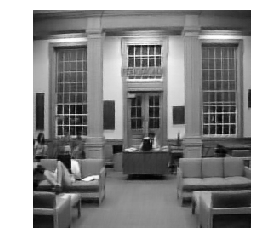

Epochs : 415 : DIS_COST  0.7335792183876038       || GEN_COST  143.3545534624271
Epochs : 420 : DIS_COST  0.6957585269754584       || GEN_COST  140.9627308774624


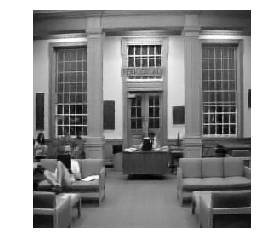

Epochs : 425 : DIS_COST  0.6803202954205599       || GEN_COST  139.8811201784916
Epochs : 430 : DIS_COST  0.7083330154418945       || GEN_COST  141.31126366844674


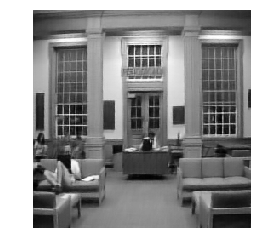

Epochs : 435 : DIS_COST  0.6789382479407571       || GEN_COST  139.0018948692356
Epochs : 440 : DIS_COST  0.6866188103502447       || GEN_COST  139.3818129965133


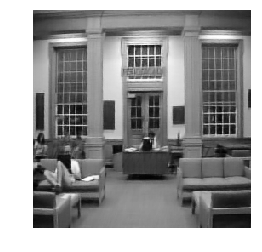

Epochs : 445 : DIS_COST  0.6682770685716108       || GEN_COST  140.63607980958454
Epochs : 450 : DIS_COST  0.7035575942559675       || GEN_COST  138.57027130011613


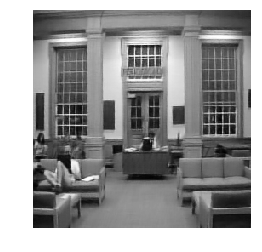

Epochs : 455 : DIS_COST  0.6815430305220864       || GEN_COST  137.5782727388661
Epochs : 460 : DIS_COST  0.6738330559297041       || GEN_COST  138.62576402690698


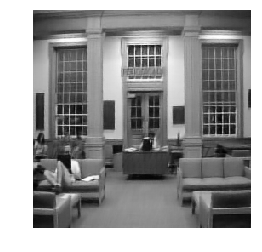

Epochs : 465 : DIS_COST  0.6893775950778614       || GEN_COST  138.17097372298548
Epochs : 470 : DIS_COST  0.7006938349116932       || GEN_COST  137.57806730858067


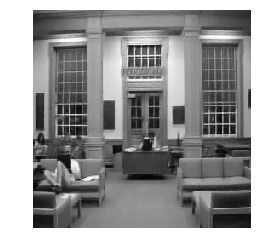

Epochs : 475 : DIS_COST  0.6829177141189575       || GEN_COST  138.79380605597277
Epochs : 480 : DIS_COST  0.7043276537548412       || GEN_COST  136.40582103706618


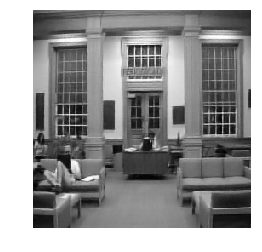

Epochs : 485 : DIS_COST  0.6897312836213545       || GEN_COST  135.94457429719623
Epochs : 490 : DIS_COST  0.6998671401630748       || GEN_COST  136.57459819072488


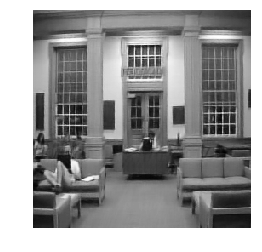

Epochs : 495 : DIS_COST  0.6837794618173079       || GEN_COST  136.7074530286745


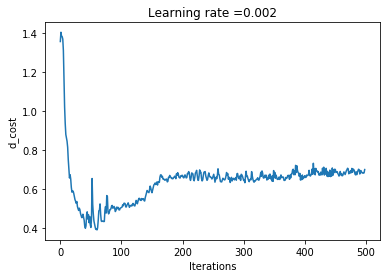

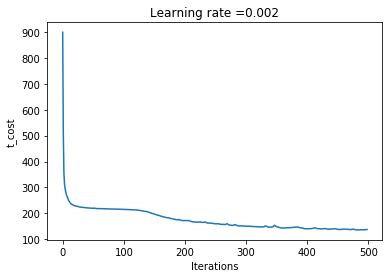

In [0]:
Gen_Imgs = model(blurry,benchmark,epochs = 500, minibatch_size = 256,learning_rate=0.002)

# Saver

In [0]:
saver = tf.train.Saver()
saver.save(sess, './my_model')

'./my_model'

In [0]:
sess_saved =  tf.Session()   
saver.restore(sess_saved, './my_model')

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./my_model


# Extra

In [0]:
tst_imgs = translator(blurry[0:200,:,:,:],200)
tst_imgs = sess_saved.run(tst_imgs)

In [0]:
j = [1,181,180,18,177,77,7,6,66,186,100,55]
i = j[1]
l = tf.reshape(tst_imgs[i],[256,256])
lb = tf.reshape(blurry[i],[256,256])
lo = tf.reshape(benchmark[i],[256,256])

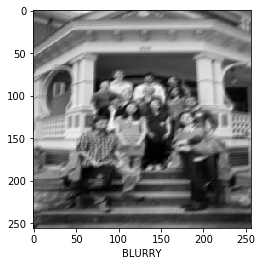

In [0]:
plt.xlabel('BLURRY')
plt.imshow(sess.run(lb),cmap='gray')

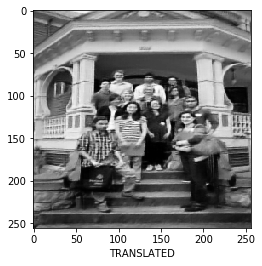

In [0]:
plt.xlabel('TRANSLATED')
plt.imshow(sess.run(l),cmap='gray')

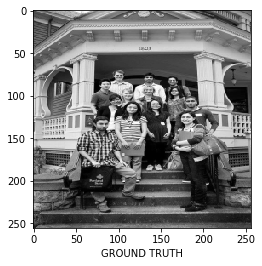

In [0]:
plt.xlabel('GROUND TRUTH')
plt.imshow(sess.run(lo),cmap='gray')